In [2]:
import os
import numpy as np
import scipy as sp
import scipy.linalg as LA

import matplotlib 
import matplotlib.pyplot as plt

homedir = os.path.expanduser('~')

font = {'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

## Growth factor

Let's compute some growth factors of random matrices. We will carry out LU decomposition of the matrix $A$ with partial pivoting. 
This results in 

$$ PA = LU $$

The growth factor $\rho$ is defined 
$$
\rho = \frac{\max_{ij} |u_{ij}|}{\max_{ij} |a_{ij}|}
$$

We know the maximal possible growth factor is given by 
$$ 
\rho = 2^{n-1}
$$

But this is really rate. In fact below we compute typical growth factors.

In [34]:
ns = np.unique(np.ceil(np.logspace(0, 3, 150))).astype(int)

# number of matrices to generate
M = 20

# Normal
mu    = 0.0
stdev = 100.0

rhos = np.empty((M * ns.size, 2), dtype=float)
for i, n in enumerate(ns):
    for k in range(M):
        A = np.random.normal(mu, stdev, size=n**2).reshape((n, n))
        p, l, u = LA.lu(A)
    
        # Compute growth factor
        rho = np.max(np.abs(u)) / np.max(np.abs(A))
        rhos[i * M + k, 0] = n
        rhos[i * M + k, 1] = rho

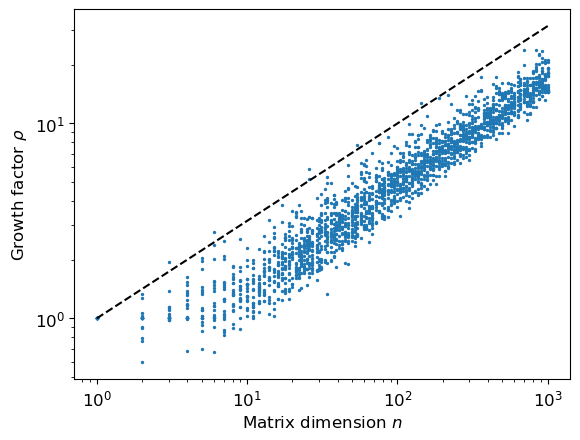

In [88]:
fig, ax = plt.subplots()
ax.scatter(rhos[:, 0], rhos[:, 1], s=2)
ax.plot(ns, np.sqrt(ns), color='k', ls='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Matrix dimension $n$')
ax.set_ylabel('Growth factor $\\rho$')
fig.savefig(os.path.join(homedir, 'matrices_random.png'))

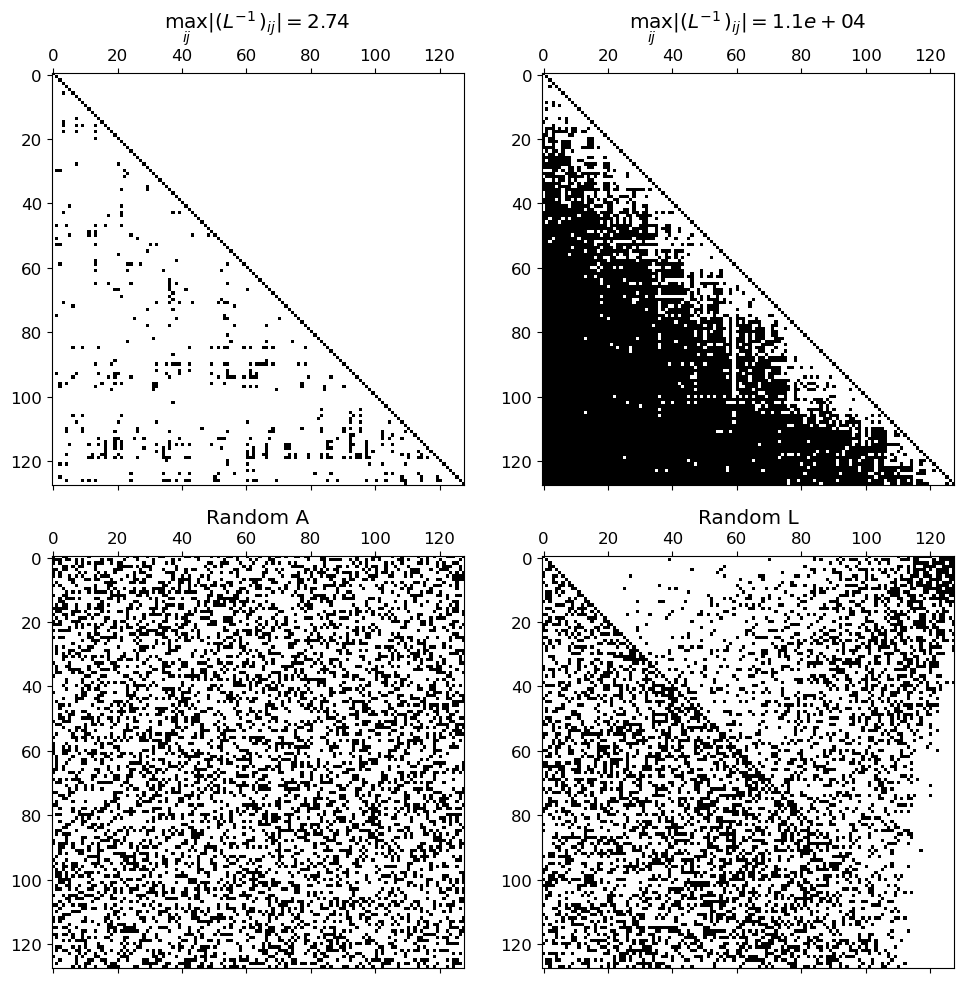

In [99]:
N = 128
A = np.random.normal(mu, stdev, size=N**2).reshape((N, N))
p, l, u = LA.lu(A)
q, r = LA.qr(A)

linv = LA.inv(l)
max_l = np.max(np.abs(linv))

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
title = '$\max_{ij} |(L^{-1})_{ij}| = $' + '${0:.2f}$'.format(max_l)
axs[0, 0].set_title(title)
axs[0, 0].spy(linv, precision=1.0-np.finfo(float).eps)

title = 'Random A'.format(max_l)
axs[1, 0].set_title(title)
axs[1, 0].spy(np.abs(q), precision=1./np.sqrt(N)-np.finfo(float).eps)

# Now create random lower triangular matrix
N = 128
stdev = 1.0
A = np.random.normal(mu, stdev, size=N**2).reshape((N, N))
np.fill_diagonal(A, 1.0)
A = np.tril(A)

# Instead let's just mess with the signs in the above L
signs = (-1)**(np.random.randint(1, 3, size=(N, N)))

# Compute the inverse
A     = signs * l
linv  = LA.inv(A)
q, r  = LA.qr(A)
max_l = np.max(np.abs(linv))

title = '$\max_{ij} |(L^{-1})_{ij}| = $' + '${0:.2g}$'.format(max_l)
axs[0, 1].set_title(title)
axs[0, 1].spy(linv, precision=1.0-np.finfo(float).eps)

title = 'Random L'.format(max_l)
axs[1, 1].set_title(title)
axs[1, 1].spy(np.abs(q), precision=1./np.sqrt(N)-np.finfo(float).eps)

fig.tight_layout()
fig.savefig(os.path.join(homedir, 'rand_matrix.png'))

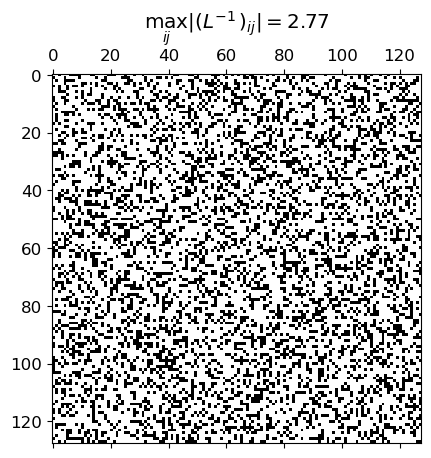

In [66]:
fig, ax = plt.subplots()
title = 'Random A'.format(max_l)
ax.set_title(title)
ax.spy(np.abs(q), precision=1./np.sqrt(N)-np.finfo(float).eps)

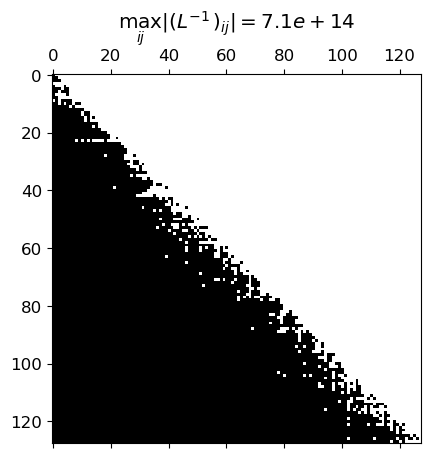

In [67]:
# Now create random lower triangular matrix
N = 128
stdev = 1.0
A = np.random.normal(mu, stdev, size=N**2).reshape((N, N))
np.fill_diagonal(A, 1.0)
A = np.tril(A)

# Compute the inverse
linv = LA.inv(A)
max_l = np.max(np.abs(linv))

fig, ax = plt.subplots()
title = '$\max_{ij} |(L^{-1})_{ij}| = $' + '${0:.2g}$'.format(max_l)
ax.set_title(title)
ax.spy(linv, precision=1.0-np.finfo(float).eps)


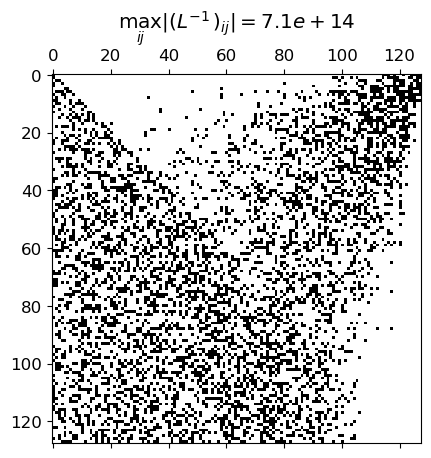

In [70]:
q, r = LA.qr(A)

fig, ax = plt.subplots()
title = '$\max_{ij} |(L^{-1})_{ij}| = $' + '${0:.2g}$'.format(max_l)
ax.set_title(title)
ax.spy(np.abs(q), precision=1./np.sqrt(N)-np.finfo(float).eps)


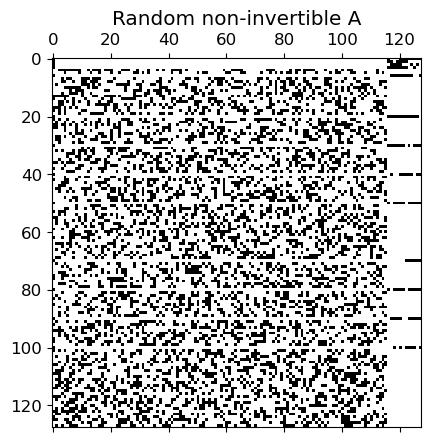

In [98]:
N = 128
A = np.random.normal(mu, stdev, size=N**2).reshape((N, N))
A[0, :] = A[1, :]
A[2, :] = A[1, :]
A[3, :] = A[1, :]
A[6, :] = A[1, :]
A[30, :] = A[1, :]
A[20, :] = A[1, :]
A[50, :] = A[1, :]
A[40, :] = A[1, :]
A[70, :] = A[1, :]
A[80, :] = A[1, :]
A[90, :] = A[1, :]
A[100, :] = A[1, :]

# p, l, u = LA.lu(A)
q, r = LA.qr(A)

# linv = LA.inv(l)
# max_l = np.max(np.abs(linv))

title = 'Random non-invertible A'.format(max_l)
fig, ax = plt.subplots()
ax.set_title(title)
ax.spy(np.abs(q), precision=1./np.sqrt(N)-np.finfo(float).eps)
